# Introduction

This notebook contains two parts. **Part 1, Logistic Regression**, provides you an opportunity to demonstrate your ability to apply course concepts by implementing a training function for logistic regression. **Part 2, Classifying Fashion Items**, provides you an opportunity to practice using widely-used ML libraries and an ML workflow to analyze a classification problem using a logistic regression model.

**You do not need to complete Part 1 in order to complete Part 2**. If you get stuck on Part 1, and choose to work on Part 2, be sure that all of your code for Part 1 runs without error. You can comment out your code in Part 1 if necessary.

# Part 1: Implementing Logistic Regression

Given a nearly-complete LogisticRegressor, and a simple training set of tumor data, demonstrate your ability to implement a logistic regression model's `fit` function, such that it properly trains its model using gradient descent.

## The LogisticRegressor

Let's first review the LogisticRegressor, which you should find familiar. Notice that the `fit` method uses a fixed number of iterations, only for simplicity and experimentation, and is stubbed to do nothing. But, also notice that the comments in `fit` describe a training process using gradient descent.

Run the code cell and observe the results.

In [1]:
import math

class LogisticRegressor:

    def __init__(self, w = 0, b = 0, alpha = 0.1):
        self.w = w
        self.b = b
        self.alpha = alpha

    def fit(self, x_train, y_train, num_iterations=100000):
        for _ in range(num_iterations):
            delta_w = self._d_cost_function_w(x_train, y_train)
            delta_b = self._d_cost_function_b(x_train, y_train)
            
            for i in range(len(self.w)):
                self.w[i] -= self.alpha * delta_w[i]
            self.b -= self.alpha * delta_b

    def cost(self, x_examples, y_class_labels):
        cost = 0
        for i in range(len(x_examples)):
            cost += self._loss(x_examples[i], y_class_labels[i])
        return cost / len(x_examples)

    def _loss(self, x, y):
        z = self._dot_product(self.w, x) + self.b
        return -y * math.log(self._sigmoid(z)) - (1 - y) * math.log(1- self._sigmoid(z))

    def _d_cost_function_w(self, x_train, y_train):
        delta_w = [0] * len(x_train[0])
        for i in range(len(x_train)):
            error = self._sigmoid(self._dot_product(self.w, x_train[i]) + self.b) - y_train[i]
            for j in range(len(delta_w)):
                delta_w[j] += error * x_train[i][j]
        for i in range(len(delta_w)):
            delta_w[i] = delta_w[i] / len(x_train)
        return delta_w

    def _d_cost_function_b(self, x_train, y_train):
        delta_b = 0
        for i in range(len(x_train)):
            delta_b += self._sigmoid(self._dot_product(self.w, x_train[i]) + self.b) - y_train[i]
        return delta_b / len(x_train)

    def predict(self, x):
        if self._sigmoid( self._dot_product(self.w, x) + self.b) >= 0.5:
            return 1
        else:
            return 0

    def _dot_product(self, a, b):
        return sum(pair[0] * pair[1] for pair in zip(a, b))

    def _sigmoid(self, exponent):
        return 1 / (1 + math.exp(-exponent))



x_train = [[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]]
y_train = [0, 0, 0, 1, 1, 1]

regressor = LogisticRegressor([0, 0], 0, 0.1)
regressor.fit(x_train, y_train)

for example in x_train:
    print(f"Prediction for {example} is {regressor.predict(example)}")

print(regressor.cost(x_train, y_train))


Prediction for [0.5, 1.5] is 0
Prediction for [1, 1] is 0
Prediction for [1.5, 0.5] is 0
Prediction for [3, 0.5] is 1
Prediction for [2, 2] is 1
Prediction for [1, 2.5] is 1
0.0016974661879524142


As we can see from the output, our classifier is currently predicting only a 1, and its cost is about 0.69.

## What to Do

Your goal is to implement, in the code cell above, the `fit` function. When complete, you should see results identical to the output shown at the end of the *Exploration: Applying Logistic Regression*.

1. Implement the `fit` function in the code cell above.
2. Run the code cell frequently, and observe the output.
3. When you believe your implementation is complete, increase the number of iterations. Compare your output to what we have seen in the corresponding Exploration.
4. Rely on the functions that are already implemented for you, such as `_d_cost_function_b` and `_d_cost_function_w`.

The best tip for thinking about this challenge is to become intimately familiar with the process of gradient descent, and recognizing what `_d_cost_function_b` and `_d_cost_function_w` return. **Use the comments in the `fit` function as a general guide, not a literal line-by-line translation into code.**

You'll know your implementation is sound when the output of the code cell matches what we have seen in the *Exploration: Applying Logistic Regression*.

## 💡 Conclusion

I took a look at the Logistic Regressor and made another code output to copy over. I looked back and forth and compared it to the exploration in this week's module. It took me a bit to understand the gradient descent optimization algoithm, but I managed to figure it out when diving deep into weights and bias in the logistic regression model. I implemented the fit method, where I write code using deltas for w and b. The deltas were able to compute the _d_cost_function_ and _d_cost_function_b successfully. When implementing weight and bias, I wrote code to calculate deltas using the _d_cost_function_w and _d_cost_function_b, which I used to update each weight element in w by subtracting the change times of alpha. I decided to also update the bias b by subtracting change times alpha as well. When I continiously modify and ran the implementation, the numbers of iterations match the exploration to the point where I feel like it's complete. Overall, the code iteratively performs gradient descent and is computing the gradients of the cost function, updating weights/bias based on computed gradients, and is constantly being repeated for this process by x amount of times.

# Part 2: Classifying Fashion Items

In this, the second, part of this notebook, you will observe a non-annotated implementation of a machine learning process, and enhance it with descriptive markdown cells and additional code. Your goal is to narrate and improve an experiment that measures the performance of the [scikit-learn LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model for classifying images of fashion items. We'll use the popular [Fashion MNIST data set](https://github.com/zalandoresearch/fashion-mnist) by Xiao, Rasul, and Vollgraf. Take a moment now to [familiarize yourself with the version of this data set](), and also take a look at [a version of this data on Kaggle](https://www.kaggle.com/datasets/zalando-research/fashionmnist).

Unlike prior notebooks, in which you are given either a guided framework of steps, or provided explicit code to try, in this notebook the code shall be your framework. Your goal is to break apart this one big code cell into a cohesive, multi-section, narrated Notebook, that guides the reader through the machine learning process. You have seen and practiced this in prior Notebooks, and you are encouraged to replicate the spirit of our past work here.

In other words, below you have a bunch of code. Your goal is to:

1. Narrate a machine learning process
2. Explain what the code is doing, and add to it as necessary
3. Experiment, tune the model, and discuss your results

Your Notebook should consist of many sections, with each section representing a step in the machine learning process. The first section has been completed for you. Each section should start with a markdown cell containing a descriptive second-level header, and at least a few sentences that prepare the reader for what the purpose of the step is.

Each section should consist of both prose, in markdown cells, and code cells. Almost every section should consist of multiple markdown and code cells. You should often add to the provided code. For example, if you have a section on exploring data, you should probably do more than just look at the `head` and `shape`.

Your first step is to run the code block, and spend time with each line of code to discern how it reflects some unit of work in our machine learning process.

In the end, demonstrate how you modify the experiment and/or tune the model to increase the accuracy of the model. (Spend time with the [official documentation of the data set](https://github.com/zalandoresearch/fashion-mnist). What is the human accuracy score? Can your model surpass it when validated with the complete training set?)


# Problem Statement

Our goal is to automate the identification of images of ten different kinds of fashion items, from t-shirts to ankle boots. To do so, we will attempt to train a logistic regression model using a well-prepared data set of images of fashion items. Our goal is to tune our end-to-end machine learning process, and to tune our classification model, to see how accurately it may predict the correct class label of different fashion items.

## Step 1: Clothing used in Classification with Logistic Regression

In this notebook, we will explore the task of classifying images of clothing items using logistic regression. The goal is to build a model that can accurately predict the class labels of different clothing items.

#### Dataset
First, we will be using the Fashion MNIST dataset, a dataset to help learn about image classification . In this dataset, it contains grayscale images of various fashion items, including t-shirts/top, trousers, pullovers, dresses, coats, sandals, shirts, sneakers, bags, and ankle boots. Each image is a 28x28-pixel square of grayscale image.

We will start by loading the libraries and dataset then examine its structure below.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression


#warning of packages is a-ok!
fashion_data = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_train.csv')
fashion_data.shape
fashion_data.head()
fashion_test_set = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_test.csv')
fashion_test_set.shape

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


(10000, 785)

The dataset contains 60,000 training examples and consists of 785 columns. The first column is the label of the fashion item, and the remaining 784 columns is the pixel values image that we are interested in.

## Step 2: Data Exploration

Next, let's visualize some example images and their labels. What's happening here is a dictionary called labels is being defined from 0-9, which refers to class names. The function display_image is being defined, and takes on two parameters known as features, and numeric_label. The point of this function is to be responsible in displaying an image along with the correct class label. It will print out the class label based on the numeric_label in respect to the labels dictionary.

In [3]:
import matplotlib.pyplot as plt

labels = {
    0: 'T-shirt / Top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot'
}

def display_image(features, numeric_label):
    print(f"Class: {labels[numeric_label]}")
    plt.imshow(features.reshape(28, 28))

## Step 3: Data Preprocessing

The third step is to preprocess the data. We will normalize the pixel values to a range of 0 to 1. This normalization step helps improve the convergence of the model when we are training it. What is going on in the code below is that we assigned X to be the value of fashion_data[fashion_data.columns[1:]], where fashion_data is a dataframe that contains fashion-related data, except the first column. Y on the other hand is assigned to fashion_data['label'], which means that it is a series column containing labels that is assigned to the fashion data.

X.head, and Y.head is being called, which shows the first few rows of X and Y. The display image is also being called three times with different aspects of the arguments. What it does is it takes the pixel values of an image from X using the loc[] accessor and take the label from Y. We can see that X is dividing it by 255, which means that the pixels value in X is being normalized. The values that are dividing by 255 are pixel values between 0 and 1. X.head will be called, which will show the normalized values of X after the normalization step.

Class: Pullover
Class: T-shirt / Top
Class: Sneaker


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.019608,0.0,0.0,...,0.000000,0.0,0.0,0.117647,0.168627,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.003922,0.007843,0.0,0.0,0.000000,0.0,0.0,...,0.011765,0.0,0.0,0.000000,0.000000,0.003922,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


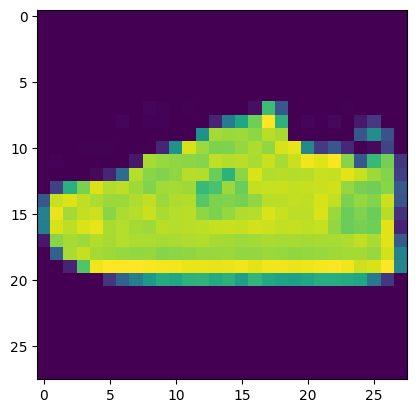

In [4]:
X = fashion_data[fashion_data.columns[1:]]
Y = fashion_data['label']
X.head()
Y.head()
display_image(X.loc[0].values, Y.loc[0])
display_image(X.loc[10].values, Y.loc[10])
display_image(X.loc[59999].values, Y.loc[59999])
X = X / 255
X.head()

Here, X represents the features (pixel values) of the images, and Y represents the corresponding labels.

## Step 4: Model Training and Evaluation

To train and evaluate our logistic regression model, we will split the dataset into training and testing sets. The training set will be used to train the model, and the testing set will be used to evaluate its performance.

#### Results and Analysis

Below written code consist of the variables x_train, x_test, y_train, and y_test, which are assigned based on the outcome of utilizing the train_test_split function. This function effectively divides the X dataset and its corresponding labels Y into separate training and testing sets. We made the test size 20%. Next, we inspect the shape of x_train, y_train, x_test, and y_test by employing the shape attribute. This provides us with valuable insights into the dimensions of each array, enabling us to understand the number of rows and columns present. After that, the code enters a loop, iterating through a predefined list of values [1, 10, 50]. Once the model is trained, we move on to the pivotal phase of prediction and evaluation. Predictions are made on the x_test data using the predict method, allowing us to compare the predicted values (y_pred) against the actual labels (y_test).  Accuracy represents the proportion of correctly predicted labels to the total number of samples and the accuracy_count is the specific count of correctly predicted labels. Precision on the other hand is recall as derived weighted averages.   

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
x_train.shape
y_train.shape
x_test.shape
y_test.shape

for iterations in [1, 10, 50]:
    logistic_model = LogisticRegression(max_iter = iterations)
    logistic_model.fit(x_train, y_train)
    y_pred = logistic_model.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred, normalize = True)
    accuracy_count = accuracy_score(y_test, y_pred, normalize = False)
    precision = precision_score(y_test, y_pred, average = 'weighted')
    recall = recall_score(y_test, y_pred, average = 'weighted')

    print("Number of test records:\t", len(y_test))
    print("Accuracy count:\t\t", accuracy_count)
    print("Acccuracy:\t\t", accuracy)
    print("Precision:\t\t", precision)
    print("Recall:\t\t\t", recall)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Number of test records:	 12000
Accuracy count:		 3699
Acccuracy:		 0.30825
Precision:		 0.5242862033967779
Recall:			 0.30825


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Number of test records:	 12000
Accuracy count:		 8762
Acccuracy:		 0.7301666666666666
Precision:		 0.7239854018686158
Recall:			 0.7301666666666666
Number of test records:	 12000
Accuracy count:		 10150
Acccuracy:		 0.8458333333333333
Precision:		 0.8448312863097965
Recall:			 0.8458333333333333


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


To sum everything up in this code chunk, we iterate over different numbers of iterations for the logistic regression model. We train the model on the training set and then predict the labels for the testing set. We then computed various evaluation metrics, including accuracy, precision, and recall, to see how the performance of the model performs.


## Conclusion

In this notebook, we dived into classification with logistic regression on clothes. We prepared the data, trained a logistic regression model, and evaluated its performance using various metrics. By experimenting with different numbers of iterations, we observed how the model's accuracy changed. If we were to improve the model, we can investigate additional techniques and hyperparameter settings.